# Isometry-invariant transformations of a 2D point cloud

In [1]:
import pyrootutils

root = pyrootutils.setup_root(
    "/home/jmordacq/Documents/IRBA/dev/ripsnet", # path to the root directory
    project_root_env_var=True,
    pythonpath=True
)

import torch
import numpy as np
import matplotlib.pyplot as plt

from src.data.utils.create_circles import create_multiple_circles
from src.data.transforms.translation import Translation
from src.data.transforms.rotation import Rotation2d
from src.data.transforms.transforms import MultiViewIsometricTransform

In [2]:
# point_cloud = create_multiple_circles(2, 200)
translation = Translation((-10, 10))
rotation  = Rotation2d((-45, 45))
point_cloud = np.array([[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])

Text(0.5, 1.0, 'Translated point cloud')

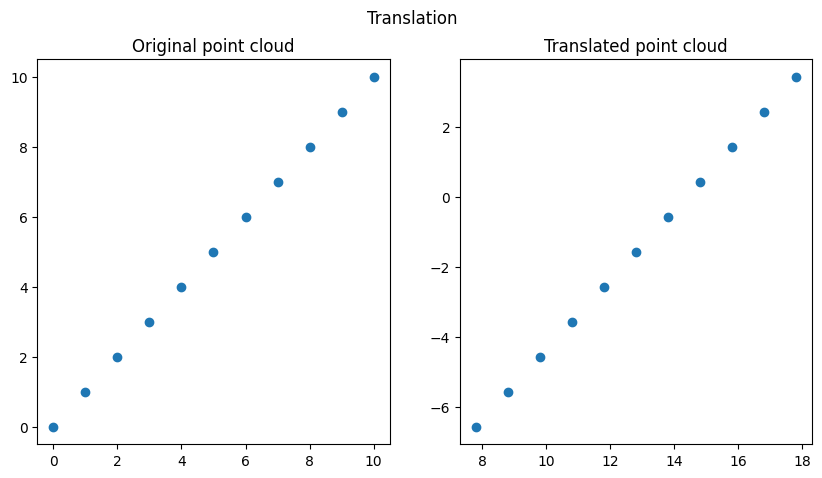

In [3]:
pc = torch.from_numpy(point_cloud).float()
translated_pc = translation(pc)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Translation")
axes[0].scatter(pc[:, 0], pc[:, 1])
axes[0].set_title("Original point cloud")
axes[1].scatter(translated_pc[:, 0], translated_pc[:, 1])
axes[1].set_title("Translated point cloud")

Text(0.5, 1.0, 'Rotated point cloud')

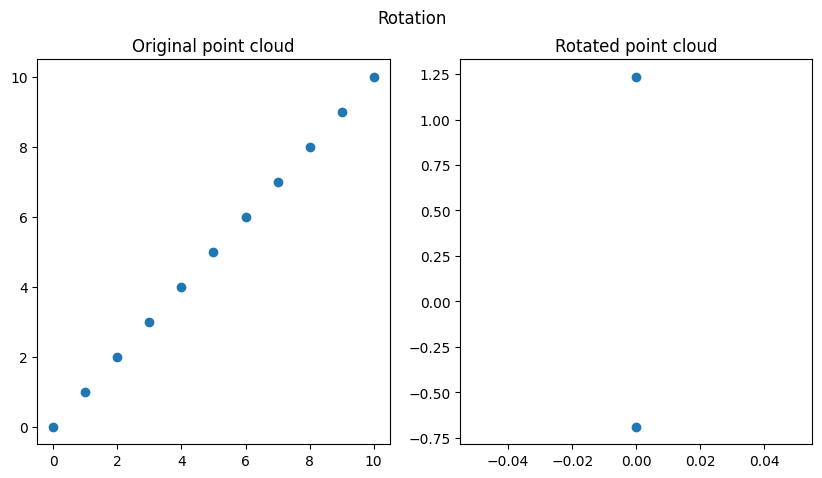

In [4]:
pc = torch.from_numpy(point_cloud).float()
rotated_pc = rotation(pc.expand(1, -1, -1))
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Rotation")
axes[0].scatter(pc[:, 0], pc[:, 1])
axes[0].set_title("Original point cloud")
axes[1].scatter(rotated_pc[:, 0], rotated_pc[:, 1])
axes[1].set_title("Rotated point cloud")

Text(0.5, 1.0, 'View 2')

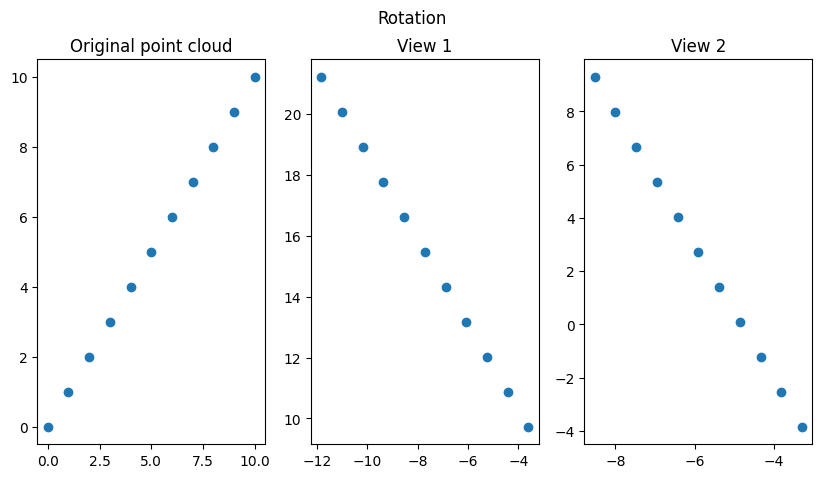

In [7]:
pc = torch.from_numpy(point_cloud).float()

transform = MultiViewIsometricTransform(rotation=rotation, translation=translation)

pc_1, pc_2 = transform(pc)
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
fig.suptitle("Rotation")
axes[0].scatter(pc[:, 0], pc[:, 1])
axes[0].set_title("Original point cloud")
axes[1].scatter(pc_1[:, 0], pc_1[:, 1])
axes[1].set_title("View 1")
axes[2].scatter(pc_2[:, 0], pc_2[:, 1])
axes[2].set_title("View 2")